<a href="https://colab.research.google.com/github/sangun1234/inflation-investment-strategy/blob/main/202044024_%EC%9E%84%EC%83%81%EC%9A%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

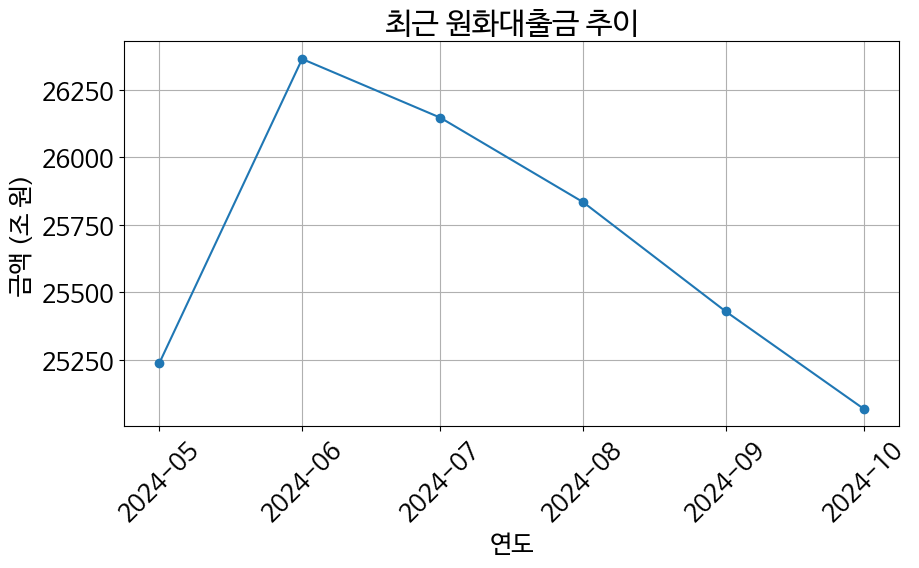

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = '/content/한국은행_원화대출금_20241126133843.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 데이터 준비
date_columns = data.columns[1:]  # '계정항목별' 제외한 월별 데이터
values = data.loc[data['계정항목별'] == '원화대출금(계)', date_columns].values.flatten()

# 날짜와 값을 시계열 데이터로 정리
dates = pd.to_datetime(date_columns, format='%Y.%m')

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(dates, values, marker='o')

# 그래프 제목과 레이블 설정
plt.title('최근 원화대출금 추이')
plt.xlabel('연도')
plt.ylabel('금액 (조 원)')

# x축 레이블 회전 및 그리드 추가
plt.xticks(rotation=45)
plt.grid(True)

# 그래프 출력
plt.show()

<ipython-input-5-40efc4110bc3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producer_filtered['시점'] = pd.to_datetime(producer_filtered['시점'], format='%Y.%m')


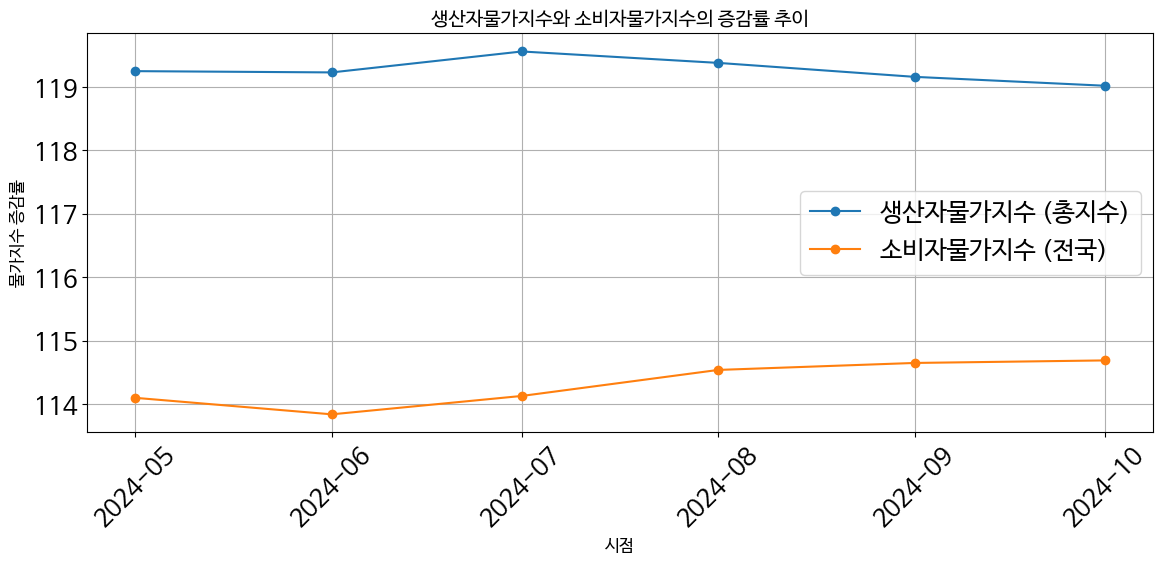

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
producer_data = pd.read_csv("생산자물가지수_기본분류__20241126133009.csv", encoding='cp949')
consumer_data = pd.read_csv("소비자물가지수_2020100__20241126132932.csv", encoding='cp949')

# 데이터 전처리
# 생산자물가지수 데이터를 Long 형태로 변환
producer_long = producer_data.melt(id_vars=['계정코드별'], var_name='시점', value_name='생산자물가지수')
producer_filtered = producer_long[producer_long['계정코드별'] == '총지수']

# 소비자물가지수 데이터를 Long 형태로 변환
consumer_long = consumer_data.melt(id_vars=['시도별'], var_name='시점', value_name='소비자물가지수')
consumer_filtered = consumer_long[consumer_long['시도별'] == '전국']

# 시점 데이터 변환 및 정렬
producer_filtered['시점'] = pd.to_datetime(producer_filtered['시점'], format='%Y.%m')
consumer_filtered['시점'] = pd.to_datetime(consumer_filtered['시점'], format='%Y.%m')

producer_filtered = producer_filtered.sort_values('시점')
consumer_filtered = consumer_filtered.sort_values('시점')

# 그래프 작성
plt.figure(figsize=(12, 6))

# 생산자물가지수 선 그래프
plt.plot(producer_filtered['시점'], producer_filtered['생산자물가지수'],
         marker='o', label='생산자물가지수 (총지수)')

# 소비자물가지수 선 그래프
plt.plot(consumer_filtered['시점'], consumer_filtered['소비자물가지수'],
         marker='o', label='소비자물가지수 (전국)')

# 그래프 제목과 축 레이블 설정
plt.title('생산자물가지수와 소비자물가지수의 증감률 추이', fontsize=14)
plt.xlabel('시점', fontsize=12)
plt.ylabel('물가지수 증감률', fontsize=12)

# x축 눈금 라벨 회전
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

<ipython-input-8-f62d745260d2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2_filtered['M2'] = m2_filtered['M2'].str.extract('([\d\.]+)').astype(float)
<ipython-input-8-f62d745260d2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2_filtered['시점'] = pd.to_datetime(m2_filtered['시점'], errors='coerce', format='%Y.%m')


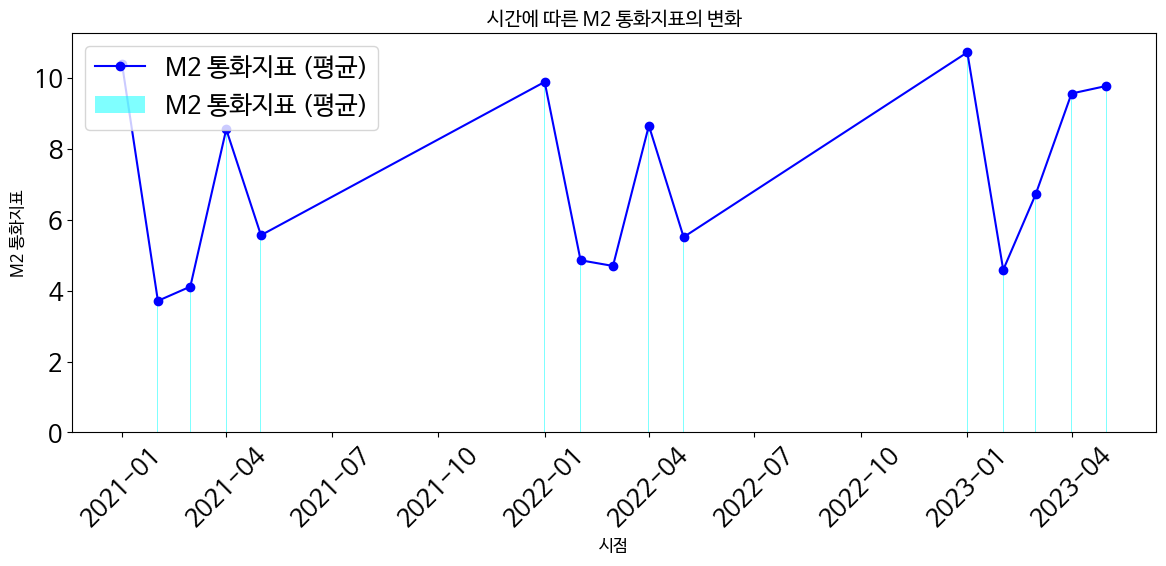

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
m2_data = pd.read_csv("통화지표_20241126135008.csv", encoding='cp949')

# 데이터 전처리
# 데이터를 Long 형태로 변환
m2_long = m2_data.melt(id_vars=['국가(1)', '국가(2)'], var_name='시점', value_name='M2')

# 관심 있는 데이터 필터링 (예: 아시아)
m2_filtered = m2_long[m2_long['국가(1)'] == '아시아']  # 필요에 따라 필터 조건 변경

# M2 데이터를 숫자로 변환
m2_filtered['M2'] = m2_filtered['M2'].str.extract('([\d\.]+)').astype(float)

# 시점 데이터를 datetime 형식으로 변환
m2_filtered['시점'] = pd.to_datetime(m2_filtered['시점'], errors='coerce', format='%Y.%m')

# 유효한 시점 데이터만 사용
m2_filtered = m2_filtered.dropna(subset=['시점'])

# 시점별 평균 M2 계산
m2_grouped = m2_filtered.groupby('시점')['M2'].mean().reset_index()

# 그래프 작성
plt.figure(figsize=(12, 6))

# 선 그래프
plt.plot(m2_grouped['시점'], m2_grouped['M2'], marker='o', label='M2 통화지표 (평균)', color='blue')

# 막대 그래프
plt.bar(m2_grouped['시점'], m2_grouped['M2'], alpha=0.5, label='M2 통화지표 (평균)', color='cyan')

# 그래프 제목 및 축 레이블 설정
plt.title('M2 통화지표의 변화', fontsize=14)
plt.xlabel('시점', fontsize=12)
plt.ylabel('M2 통화지표', fontsize=12)

# x축 눈금 라벨 회전
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

<ipython-input-11-99f74e6b24f3>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['증감률'] = df['지수'].pct_change() * 100
<ipython-input-11-99f74e6b24f3>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['증감률'] = df['지수'].pct_change() * 100
<ipython-input-11-99f74e6b24f3>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

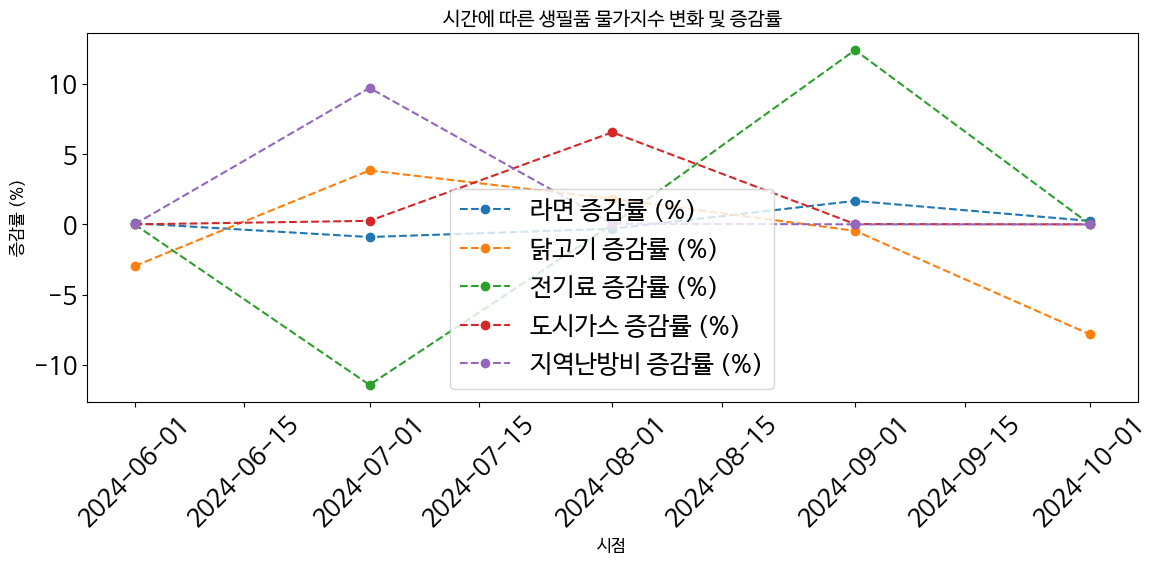

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
producer_file_path = "/content/생산자물가지수_품목별__20241126135615.csv"
consumer_file_path = "/content/품목별_소비자물가지수_품목성질별_2020100__20241126135736.csv"

# CSV 파일 읽기
producer_data = pd.read_csv(producer_file_path, encoding='cp949')
consumer_data = pd.read_csv(consumer_file_path, encoding='cp949')

# 데이터 전처리
# 생산자물가지수 데이터를 Long 형태로 변환
producer_long = producer_data.melt(id_vars=['계정코드별'], var_name='시점', value_name='지수')
producer_long['시점'] = pd.to_datetime(producer_long['시점'], format='%Y.%m', errors='coerce')

# 소비자물가지수 데이터를 Long 형태로 변환
consumer_long = consumer_data.melt(id_vars=['시도별', '품목별'], var_name='시점', value_name='지수')
consumer_long['시점'] = pd.to_datetime(consumer_long['시점'], format='%Y.%m', errors='coerce')

# 품목 필터링
producer_filtered = producer_long[producer_long['계정코드별'] == '닭고기 (2020=100)']
consumer_filtered_ramen = consumer_long[consumer_long['품목별'] == '라면']
consumer_filtered_electricity = consumer_long[consumer_long['품목별'] == '전기료']
consumer_filtered_gas = consumer_long[consumer_long['품목별'] == '도시가스']
consumer_filtered_heating = consumer_long[consumer_long['품목별'] == '지역난방비']

# 퍼센트 변화율 계산
for df in [producer_filtered, consumer_filtered_ramen, consumer_filtered_electricity,
           consumer_filtered_gas, consumer_filtered_heating]:
    df['증감률'] = df['지수'].pct_change() * 100

# 시각화
plt.figure(figsize=(12, 6))

# 주요 항목 그래프 작성
plt.plot(consumer_filtered_ramen['시점'], consumer_filtered_ramen['증감률'], marker='o', label='라면 증감률 (%)', linestyle='--')
plt.plot(producer_filtered['시점'], producer_filtered['증감률'], marker='o', label='닭고기 증감률 (%)', linestyle='--')
plt.plot(consumer_filtered_electricity['시점'], consumer_filtered_electricity['증감률'], marker='o', label='전기료 증감률 (%)', linestyle='--')
plt.plot(consumer_filtered_gas['시점'], consumer_filtered_gas['증감률'], marker='o', label='도시가스 증감률 (%)', linestyle='--')
plt.plot(consumer_filtered_heating['시점'], consumer_filtered_heating['증감률'], marker='o', label='지역난방비 증감률 (%)', linestyle='--')

# 제목, 축 레이블
plt.title('시간에 따른 생필품 물가지수 변화 및 증감률', fontsize=14)
plt.xlabel('시점', fontsize=12)
plt.ylabel('증감률 (%)', fontsize=12)

# x축 눈금 라벨 회전
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

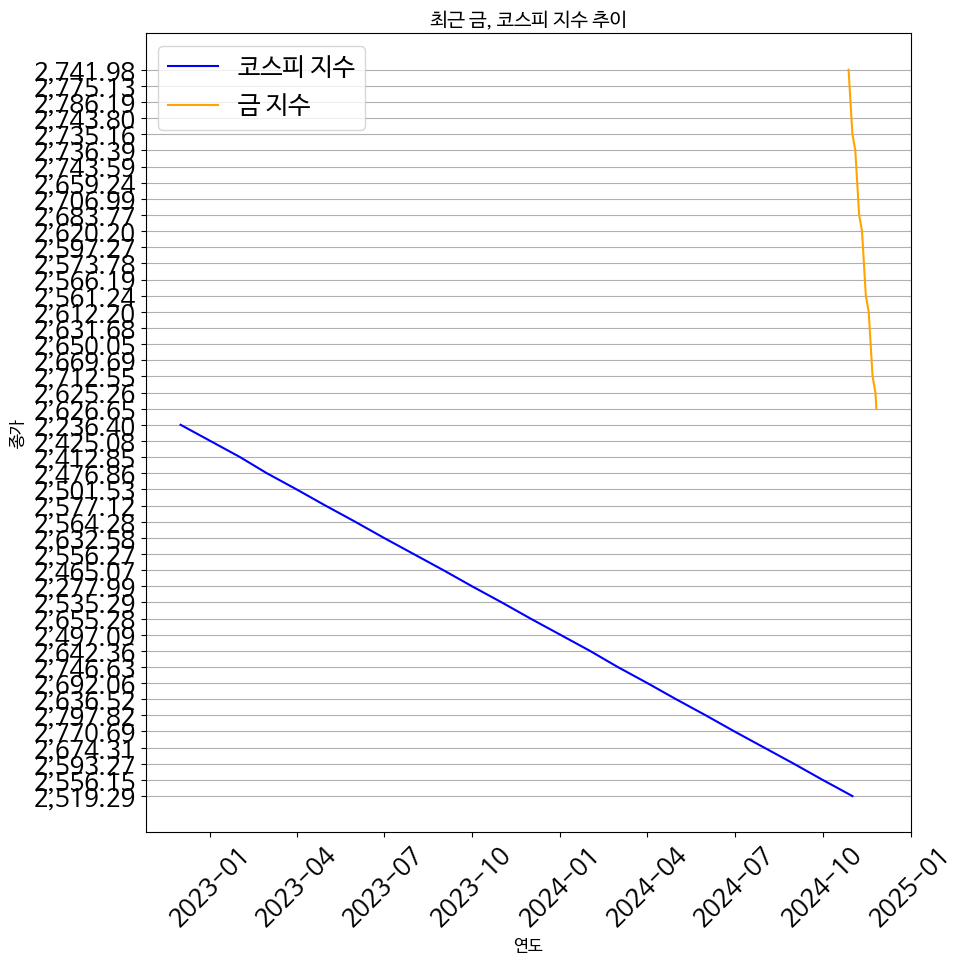

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
gold_file_path = '/content/XAU_USD 과거 데이터.csv'
kospi_file_path = '/content/코스피지수.csv'

gold_data = pd.read_csv(gold_file_path, encoding='utf-8')
kospi_data = pd.read_csv(kospi_file_path, encoding='utf-8')

# 날짜 형식 정리
gold_data['날짜'] = pd.to_datetime(gold_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")
kospi_data['날짜'] = pd.to_datetime(kospi_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")

# 그래프 생성 (세로로 더 긴 크기 설정)
plt.figure(figsize=(10, 10))  # 기존 (10, 6)에서 세로를 늘려 (10, 8)로 설정

# 금과 코스피 지수의 종가 선 그래프
plt.plot(kospi_data['날짜'], kospi_data['종가'], label='코스피 지수', color='blue')
plt.plot(gold_data['날짜'], gold_data['종가'], label='금 지수', color='orange')

# 추세선을 위한 2013년과 2023년 데이터 생성
gold_years = [gold_data['날짜'].min(), gold_data['날짜'].max()]
gold_values = [1251, 1976]  # 금의 시작과 끝 값

kospi_years = [kospi_data['날짜'].min(), kospi_data['날짜'].max()]
kospi_values = [1961.94, 2641.16]  # 코스피의 시작과 끝 값

# 그래프 제목과 축 레이블 설정
plt.title('최근 금, 코스피 지수 추이', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('종가', fontsize=12)

# x축 눈금 라벨 회전
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 격자 추가
plt.grid(True, axis='y')

# 그래프 출력
plt.tight_layout()
plt.show()

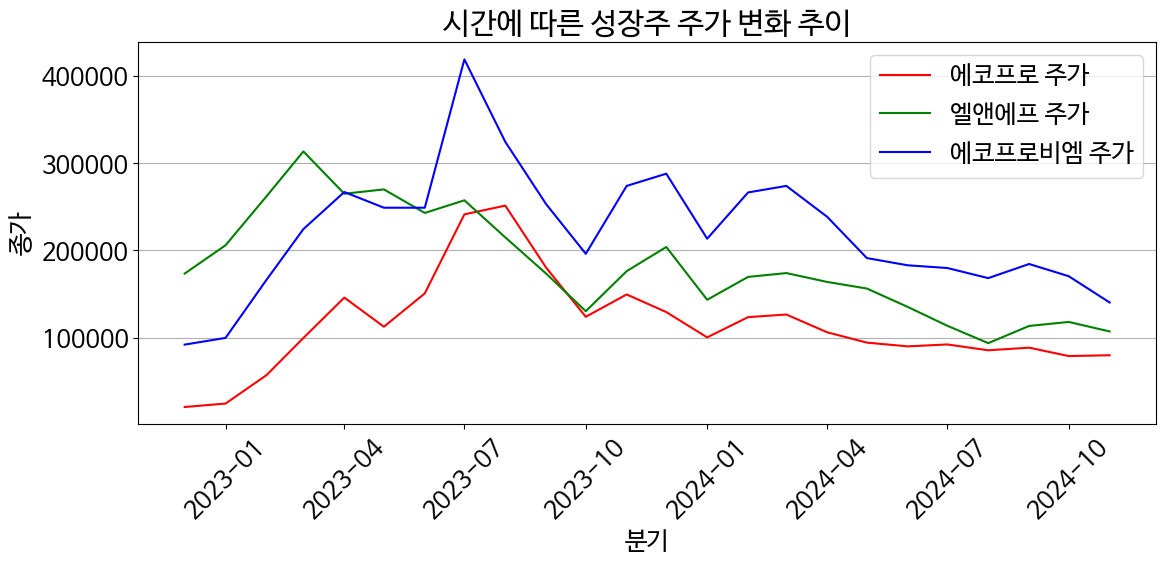

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
eco_file_path = '/content/에코프로.csv'
ln_file_path = '/content/엘앤에프.csv'
bm_file_path = '/content/에코프로비엠.csv'

# CSV 파일 불러오기 및 날짜 형식 정리
eco_data = pd.read_csv(eco_file_path, encoding='utf-8')
eco_data['날짜'] = pd.to_datetime(eco_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")

ln_data = pd.read_csv(ln_file_path, encoding='utf-8')
ln_data['날짜'] = pd.to_datetime(ln_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")

bm_data = pd.read_csv(bm_file_path, encoding='utf-8')
bm_data['날짜'] = pd.to_datetime(bm_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")

# 일봉 선 차트 그리기
plt.figure(figsize=(12, 6))

plt.plot(eco_data['날짜'], eco_data['종가'].str.replace(',', '').astype(float),
         label='에코프로 주가', color='red')
plt.plot(ln_data['날짜'], ln_data['종가'].str.replace(',', '').astype(float),
         label='엘앤에프 주가', color='green')
plt.plot(bm_data['날짜'], bm_data['종가'].str.replace(',', '').astype(float),
         label='에코프로비엠 주가', color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('시간에 따른 성장주 주가 변화 추이')
plt.xlabel('분기')
plt.ylabel('종가')

# x축 눈금 라벨 회전
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 격자 추가
plt.grid(False)
plt.grid(True, axis='y')

# 그래프 출력
plt.tight_layout()
plt.show()

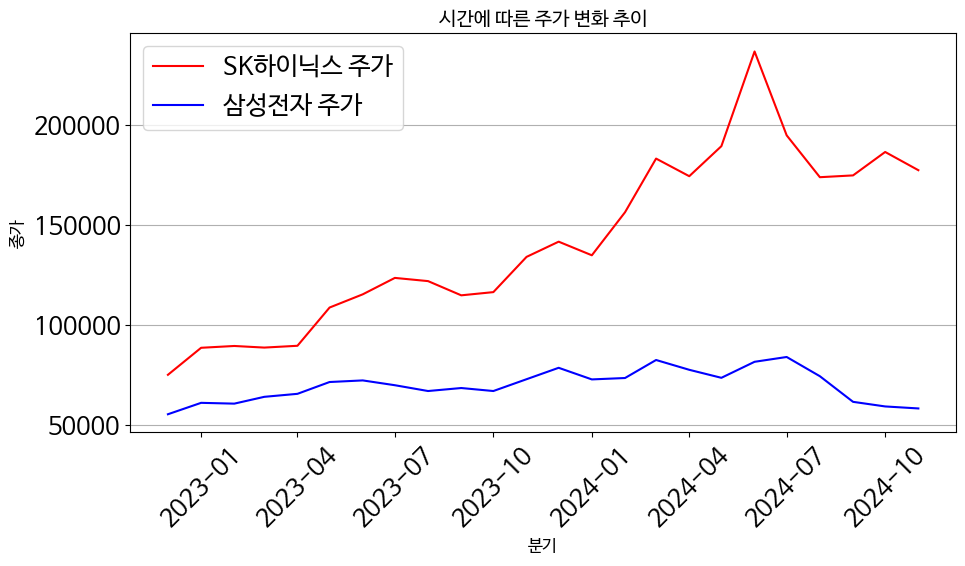

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
sk_file_path = '/content/SK하이닉스.csv'
ss_file_path = '/content/삼성전자.csv'

# CSV 파일 불러오기 및 날짜 형식 정리
sk_data = pd.read_csv(sk_file_path, encoding='utf-8')
sk_data['날짜'] = pd.to_datetime(sk_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")

ss_data = pd.read_csv(ss_file_path, encoding='utf-8')
ss_data['날짜'] = pd.to_datetime(ss_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")

# 종가 데이터를 숫자로 변환
sk_data['종가'] = sk_data['종가'].str.replace(',', '').astype(float)
ss_data['종가'] = ss_data['종가'].str.replace(',', '').astype(float)

# 일봉 선 차트 그리기
plt.figure(figsize=(10, 6))

plt.plot(sk_data['날짜'], sk_data['종가'], label='SK하이닉스 주가', color='red')
plt.plot(ss_data['날짜'], ss_data['종가'], label='삼성전자 주가', color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('시간에 따른 주가 변화 추이', fontsize=14)
plt.xlabel('분기', fontsize=12)
plt.ylabel('종가', fontsize=12)

# x축 눈금 라벨 회전
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 격자 추가
plt.grid(True, axis='y')

# 그래프 출력
plt.tight_layout()
plt.show()

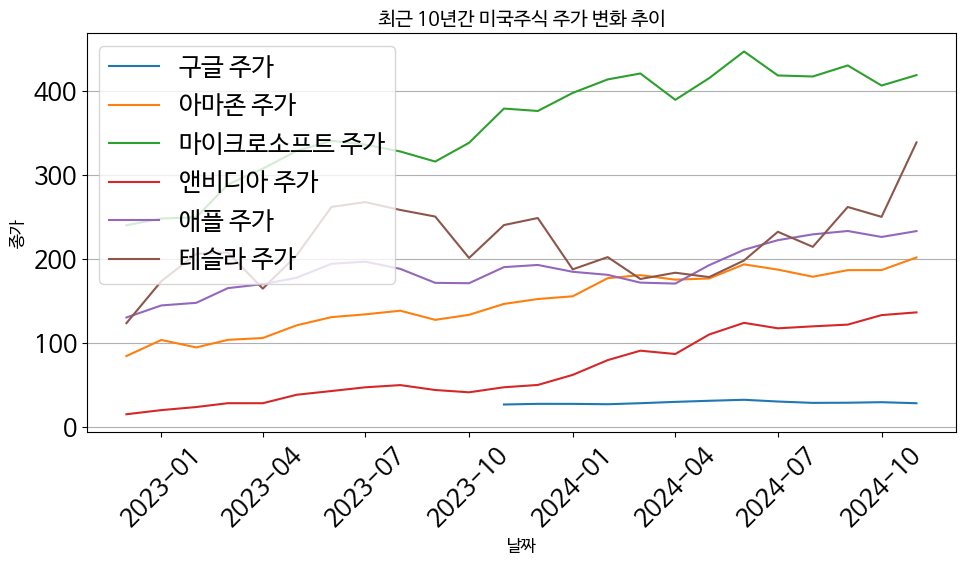

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로와 기업 이름
file_paths = {
    "구글": '/content/구글.csv',
    "아마존": '/content/아마존.csv',
    "마이크로소프트": '/content/마이크로소프트.csv',
    "앤비디아": '/content/엔비디아.csv',
    "애플": '/content/애플.csv',
    "테슬라": '/content/테슬라.csv',
    "나스닥": '/content/나스닥.csv'
}

# 데이터를 저장할 딕셔너리
dataframes = {}

# 각 파일에서 데이터를 읽어오고 날짜를 인덱스로 설정
for company, path in file_paths.items():
    df = pd.read_csv(path, encoding='utf-8')
    df['날짜'] = pd.to_datetime(df['날짜'].str.replace(' ', ''), format="%Y-%m-%d")
    df.set_index('날짜', inplace=True)
    dataframes[company] = df

# 그래프 생성
plt.figure(figsize=(10, 6))

# 기업별 주가 데이터 그리기
for company, df in dataframes.items():
    if company != "나스닥":  # 나스닥은 제외
        plt.plot(df.index, df['종가'], label=f'{company} 주가')

# 그래프 제목과 축 설정
plt.title('최근 10년간 미국주식 주가 변화 추이', fontsize=14)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('종가', fontsize=12)

# X축 눈금 회전
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 격자 설정
plt.grid(True, axis='y')

# 그래프 출력
plt.tight_layout()
plt.show()

<ipython-input-53-82da05f18d7c>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sk_data['Volume'].fillna(0, inplace=True)


처리 후 데이터프레임 크기: (24, 6)
              Close     Open     High      Low  Volume  Change
Date                                                          
2024-11-01  2519.29  2549.04  2593.15  2390.56     0.0  -1.44%
2024-10-01  2556.15  2566.55  2635.32  2552.36     0.0  -1.43%
2024-09-01  2593.27  2683.80  2695.59  2491.30     0.0  -3.03%
2024-08-01  2674.31  2787.27  2794.11  2386.96     0.0  -3.48%
2024-07-01  2770.69  2792.96  2896.43  2703.86     0.0  -0.97%


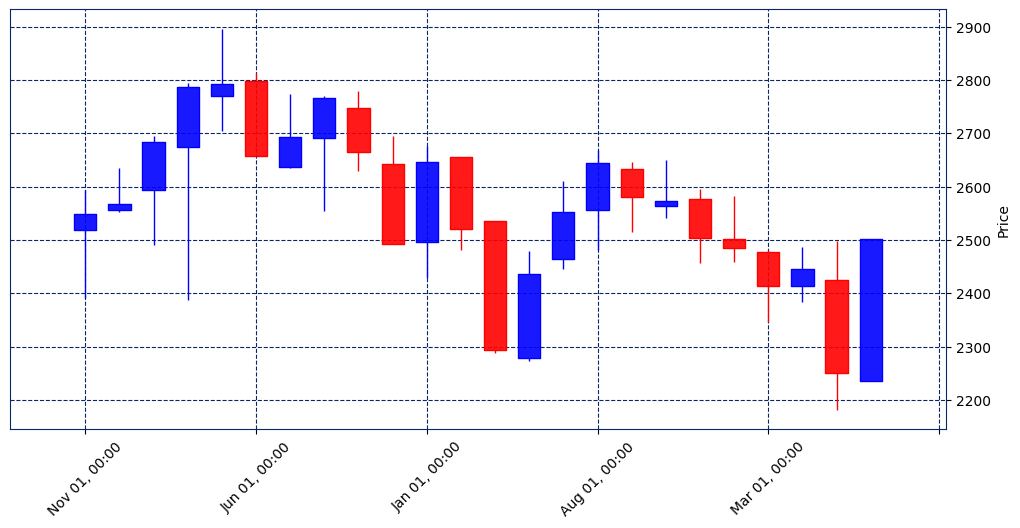

In [ ]:
#!pip install mplfinance

import pandas as pd
import mplfinance as mpf

# CSV 파일 경로
file_path = '/content/코스피지수.csv'

# 1. 데이터 로드
sk_data = pd.read_csv(file_path, encoding='utf-8')

# 2. 열 이름 변경
sk_data.rename(columns={
    '날짜': 'Date',
    '시가': 'Open',
    '고가': 'High',
    '저가': 'Low',
    '종가': 'Close',
    '거래량': 'Volume',
    '변동 %': 'Change'
}, inplace=True)

# 3. 날짜 형식 변환 및 공백 제거
sk_data['Date'] = pd.to_datetime(sk_data['Date'].str.replace(' ', ''), format="%Y-%m-%d")

# 4. 데이터를 숫자로 변환 (쉼표 제거 및 결측값 처리)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    sk_data[col] = pd.to_numeric(sk_data[col].str.replace(',', '').replace('-', 'NaN'), errors='coerce')

# 5. Volume 열 결측값 대체
sk_data['Volume'].fillna(0, inplace=True)

# 6. 결측값 제거
sk_data.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

# 7. "Date"를 인덱스로 설정
sk_data.set_index('Date', inplace=True)

# 데이터 크기 확인
print("처리 후 데이터프레임 크기:", sk_data.shape)
print(sk_data.head())  # 데이터 미리보기

# 8. 캔들차트 스타일 설정
mc = mpf.make_marketcolors(up="r", down="b", edge="inherit", wick="inherit")
s = mpf.make_mpf_style(base_mpf_style="starsandstripes",
                       marketcolors=mc, gridaxis='both', y_on_right=True)

# 9. 캔들차트 출력
mpf.plot(sk_data, type='candle', style=s, figsize=(13, 6))

병합된 데이터프레임:
               삼성전자      코스피
날짜                          
2024-11-01  58200.0  2519.29
2024-10-01  59200.0  2556.15
2024-09-01  61500.0  2593.27
2024-08-01  74300.0  2674.31
2024-07-01  83900.0  2770.69


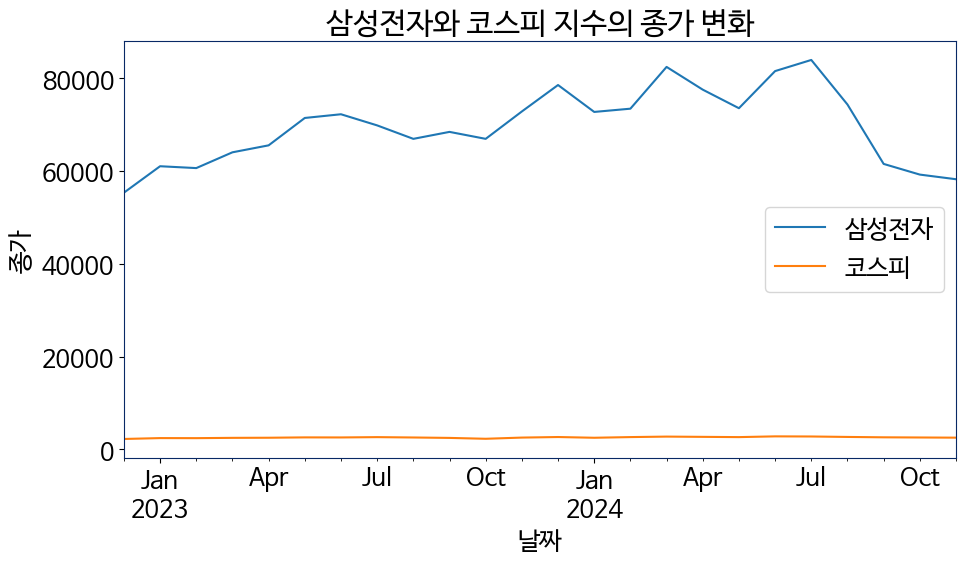

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

# CSV 파일 경로
ss_file_path = '/content/삼성전자.csv'
kospi_file_path = '/content/코스피지수.csv'

# CSV 파일 읽기
ss_data = pd.read_csv(ss_file_path, encoding='utf-8')
kospi_data = pd.read_csv(kospi_file_path, encoding='utf-8')

# 날짜 열을 Datetime 형식으로 변환 및 공백 제거
ss_data['날짜'] = pd.to_datetime(ss_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")
kospi_data['날짜'] = pd.to_datetime(kospi_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")

# "날짜"를 인덱스로 설정
ss_data.set_index('날짜', inplace=True)
kospi_data.set_index('날짜', inplace=True)

# 종가 데이터를 추출
ss_close = ss_data['종가'].str.replace(',', '').astype(float)
kospi_close = kospi_data['종가'].str.replace(',', '').astype(float)

# 데이터프레임 합치기
merged_data = pd.concat([ss_close, kospi_close], axis=1)
merged_data.columns = ['삼성전자', '코스피']

# 데이터 확인
print("병합된 데이터프레임:")
print(merged_data.head())

# 그래프 출력 (옵션)
plt.figure(figsize=(10, 6))
merged_data.plot(ax=plt.gca())
plt.title('삼성전자와 코스피 지수의 종가 변화')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

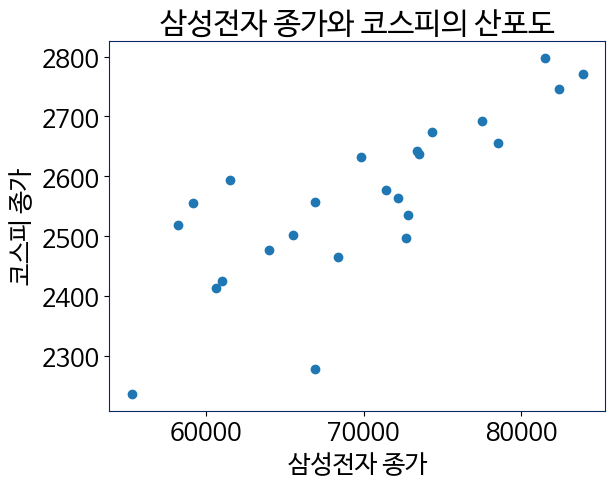

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 산포도 생성
plt.scatter(merged_data['삼성전자'], merged_data['코스피'])
plt.xlabel('삼성전자 종가')
plt.ylabel('코스피 종가')
plt.title('삼성전자 종가와 코스피의 산포도')

# 그리드
plt.grid(False)
#plt.grid(True, axis='y')
plt.show()

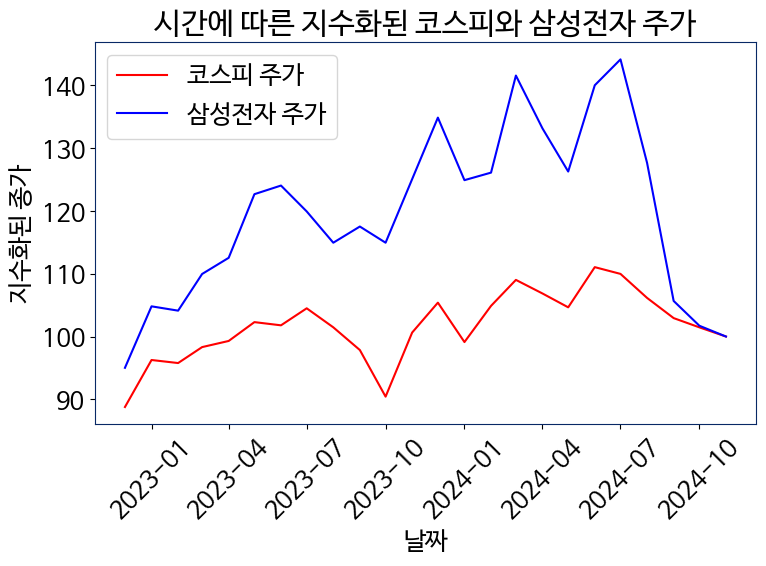

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# CSV 파일 경로
ss_file_path = '/content/삼성전자.csv'
kospi_file_path = '/content/코스피지수.csv'

# CSV 파일 읽기
ss_data = pd.read_csv(ss_file_path, encoding='utf-8')
kospi_data = pd.read_csv(kospi_file_path, encoding='utf-8')

# 날짜 열을 Datetime 형식으로 변환 및 공백 제거
ss_data['날짜'] = pd.to_datetime(ss_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")
kospi_data['날짜'] = pd.to_datetime(kospi_data['날짜'].str.replace(' ', ''), format="%Y-%m-%d")

# "날짜"를 인덱스로 설정 (선택 사항)
# ss_data.set_index('날짜', inplace=True)
# kospi_data.set_index('날짜', inplace=True)

# 종가 데이터를 숫자로 변환
ss_data['종가'] = ss_data['종가'].str.replace(',', '').astype(float)
kospi_data['종가'] = kospi_data['종가'].str.replace(',', '').astype(float)

# 삼성전자와 코스피 데이터 지수화
kospi_data['종가 지수화'] = (kospi_data['종가'] / kospi_data['종가'].iloc[0]) * 100
ss_data['종가 지수화'] = (ss_data['종가'] / ss_data['종가'].iloc[0]) * 100

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(kospi_data['날짜'], kospi_data['종가 지수화'], label='코스피 주가', color='red')
plt.plot(ss_data['날짜'], ss_data['종가 지수화'], label='삼성전자 주가', color='blue')
plt.title('시간에 따른 지수화된 코스피와 삼성전자 주가')
plt.xlabel('날짜')
plt.ylabel('지수화된 종가')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
#!pip install finance-datareader

import FinanceDataReader as fdr

# 1. 코스피 데이터 수집
kospi = fdr.DataReader('KS11', '2000')  # 2000년부터 현재까지의 코스피 데이터
kospi = kospi.dropna()  # 비어 있는 행 삭제

# 2. DatetimeIndex 설정
kospi.index = pd.to_datetime(kospi.index)  # 인덱스를 Datetime 형식으로 변환

# 3. 누적 수익률 계산
누적수익률 = 1.0

for year in range(2000, 2023):
    매수_달 = f'{year}-11'
    매도_달 = f'{year + 1}-04'

    # 매수가와 매도가 계산
    try:
        매수가 = kospi.loc[매수_달].iloc[0]['Open']  # 11월 첫 거래일 시가
        매도가 = kospi.loc[매도_달].iloc[-1]['Close']  # 4월 마지막 거래일 종가
        수익률 = 매도가 / 매수가
        누적수익률 *= 수익률
    except KeyError:
        print(f"{매수_달} 또는 {매도_달} 데이터가 없습니다.")
        continue

# 4. 결과 출력
print(f"2000년부터 2023년까지의 누적 수익률: {누적수익률:.2f}")

2000-11 또는 2001-04 데이터가 없습니다.
2000년부터 2023년까지의 누적 수익률: 5.52


2000-11 또는 2001-04 데이터가 없습니다.


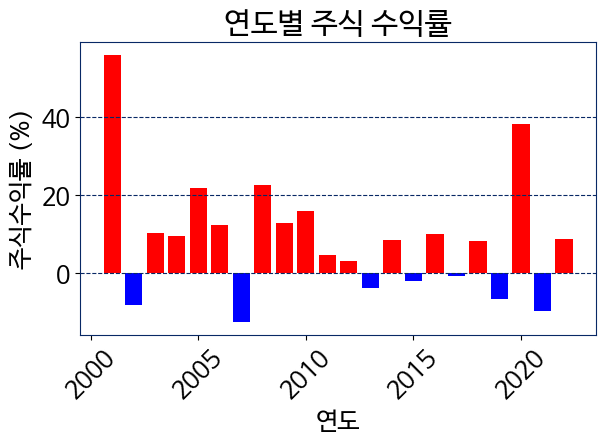

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# 코스피 데이터 수집
kospi = fdr.DataReader('KS11', '2000')  # 2000년부터 현재까지
kospi = kospi.dropna()  # 비어 있는 행 삭제

# DatetimeIndex 설정
kospi.index = pd.to_datetime(kospi.index)

# 연도별 수익률 저장 리스트
results = []

for year in range(2000, 2023):  # 2000년부터 2022년까지
    매수_달 = f'{year}-11'
    매도_달 = f'{year + 1}-04'

    try:
        # 매수가와 매도가 계산
        매수가 = kospi.loc[매수_달].iloc[0]['Open']  # 11월 첫 거래일 시가
        매도가 = kospi.loc[매도_달].iloc[-1]['Close']  # 4월 마지막 거래일 종가
        수익률 = (매도가 / 매수가 - 1) * 100  # 수익률 계산 (백분율)

        # 결과 리스트에 추가
        results.append([year, 수익률])
    except KeyError:
        # 데이터가 없는 경우 건너뜀
        print(f"{매수_달} 또는 {매도_달} 데이터가 없습니다.")
        continue

# 데이터프레임 생성
results_df = pd.DataFrame(results, columns=['연도', '주식수익률'])

# 막대 그래프 생성
colors = ['r' if x >= 0 else 'b' for x in results_df['주식수익률']]
plt.bar(results_df['연도'], results_df['주식수익률'], color=colors)

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('주식수익률 (%)')
plt.title('연도별 주식 수익률')
plt.xticks(rotation=45)
plt.grid(False)
plt.grid(True, axis='y')

# 그래프 출력
plt.tight_layout()
plt.show()

2000-01 또는 2000-06 데이터가 없습니다.
2001-01 또는 2001-06 데이터가 없습니다.
2000-02 또는 2000-07 데이터가 없습니다.
2001-02 또는 2001-07 데이터가 없습니다.
2000-03 또는 2000-08 데이터가 없습니다.
2001-03 또는 2001-08 데이터가 없습니다.
2000-04 또는 2000-09 데이터가 없습니다.
2001-04 또는 2001-09 데이터가 없습니다.
2000-05 또는 2000-10 데이터가 없습니다.
2001-05 또는 2001-10 데이터가 없습니다.
2000-06 또는 2000-11 데이터가 없습니다.
2000-07 또는 2000-12 데이터가 없습니다.
2000-08 또는 2001-01 데이터가 없습니다.
2000-09 또는 2001-02 데이터가 없습니다.
2000-10 또는 2001-03 데이터가 없습니다.
2000-11 또는 2001-04 데이터가 없습니다.
2000-12 또는 2001-05 데이터가 없습니다.


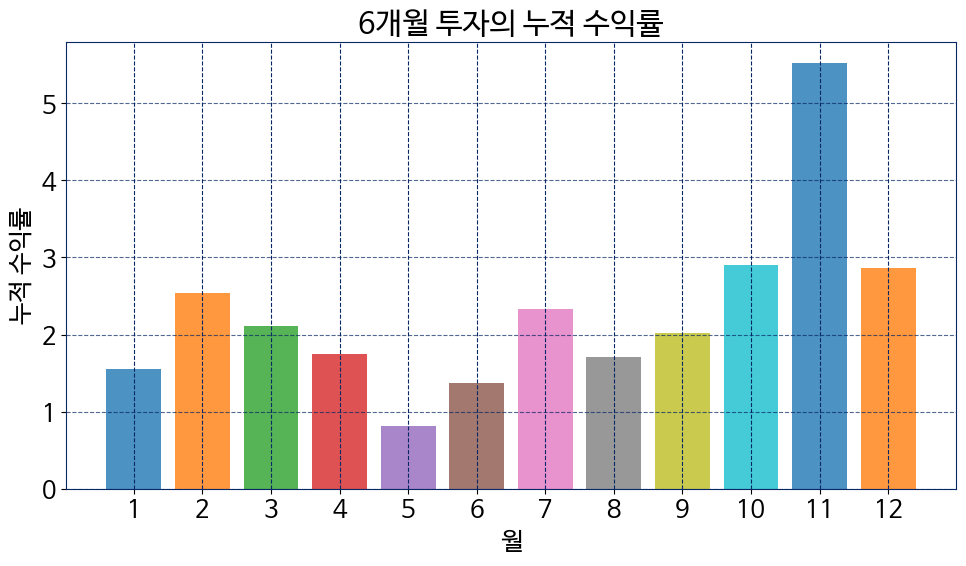

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# 1. 코스피 데이터 수집
kospi = fdr.DataReader('KS11', '2000')  # 2000년부터 현재까지 데이터
kospi = kospi.dropna()  # 결측치 제거

# 2. 인덱스를 DatetimeIndex로 변환
kospi.index = pd.to_datetime(kospi.index)

# 3. 함수 정의
def 투자6개월(df, 시작년=2000, 종료년=2023, 매수월=11):
    매도월 = 매수월 + 5
    if 매도월 > 12:  # 12월 초과 시 다음 해로 넘어감
        매도월 = 매도월 - 12

    누적수익률 = 1.0
    for year in range(시작년, 종료년):  # 2000년부터 2022년까지
        매수년 = year
        매도년 = 매수년 if 매수월 < 8 else 매수년 + 1  # 매도년 계산

        buy_month = f'{매수년}-{매수월:02d}'  # 월을 두 자리로 포맷
        sell_month = f'{매도년}-{매도월:02d}'

        try:
            # 매수월 첫날의 시작가격, 매도월 끝날의 종료가격
            매수가 = df.loc[buy_month].iloc[0]['Open']
            매도가 = df.loc[sell_month].iloc[-1]['Close']
            수익률 = 매도가 / 매수가  # 수익률 계산
            누적수익률 *= 수익률
        except KeyError:
            # 데이터가 없을 경우 건너뜀
            print(f"{buy_month} 또는 {sell_month} 데이터가 없습니다.")
            continue

    return 누적수익률

# 4. 월별 누적 수익률 계산 및 그래프 생성
plt.figure(figsize=(10, 6))

for month in range(1, 13):  # 1월부터 12월까지
    수익률 = 투자6개월(kospi, 시작년=2000, 종료년=2023, 매수월=month)
    plt.bar(month, 수익률, label=f'{month}월', alpha=0.8)

# 5. 그래프 설정
plt.xlabel('월')
plt.ylabel('누적 수익률')
plt.title('6개월 투자의 누적 수익률')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13))
plt.tight_layout()

# 그래프 출력
plt.show()